<a href="https://colab.research.google.com/github/khurram110/ML/blob/main/BleedAI_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [153]:
import cv2
from sklearn.cluster import KMeans
from collections import Counter
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
import webcolors as wb

In [137]:
def rgb_to_hex(rgb_color):
  hex_color="#"
  for i in rgb_color:
    i=int(i)
    hex_color+=("{:02x}".format(i))
  return hex_color

In [144]:
def color_chart(image):
 raw_img = cv2.imread(image)
 rgb_img = cv2.cvtColor(raw_img, cv2.COLOR_BGR2RGB)
 img = cv2.resize(rgb_img, (900,600), interpolation = cv2.INTER_AREA)
 #reshaping to a list of pixels
 img1 = img.reshape((img.shape[0] * img.shape[1], 3))
 #cluster and assign labels to the pixels 
 clt = KMeans(n_clusters = 150)
 labels = clt.fit_predict(img1)
 center_colors = clt.cluster_centers_
 center_colors
 #count labels to find most popular
 counts = Counter(labels)
 counts
 ordered_colors = [center_colors[i] for i in counts.keys()]
 ordered_colors
 hex = [rgb_to_hex(ordered_colors[i]) for i in counts.keys()]
 hex
 dominant_color = clt.cluster_centers_[counts.most_common(1)[0][0]]
 plt.figure(figsize=(100,60))
 plt.pie(counts.values(), labels=hex ,colors=hex)
 plt.savefig(f'{image[:-4]}-analysis.png')

In [151]:
def dominant_color(image):
 raw_img = cv2.imread(image)
 rgb_img = cv2.cvtColor(raw_img, cv2.COLOR_BGR2RGB)
 img = cv2.resize(rgb_img, (900,600), interpolation = cv2.INTER_AREA)
 #reshaping to a list of pixels
 img1 = img.reshape((img.shape[0] * img.shape[1], 3))
 #cluster and assign labels to the pixels 
 clt = KMeans(n_clusters = 2)
 labels = clt.fit_predict(img1)
 center_colors = clt.cluster_centers_
 center_colors
 #count labels to find most popular
 counts = Counter(labels)
 counts
 dominant_color = clt.cluster_centers_[counts.most_common(1)[0][0]]
 return dominant_color

In [157]:
def closest_colour(requested_colour):
    min_colours = {}
    for key, name in wb.CSS3_HEX_TO_NAMES.items():
        r_c, g_c, b_c = wb.hex_to_rgb(key)
        rd = (r_c - requested_colour[0]) ** 2
        gd = (g_c - requested_colour[1]) ** 2
        bd = (b_c - requested_colour[2]) ** 2
        min_colours[(rd + gd + bd)] = name
    return min_colours[min(min_colours.keys())]

def get_colour_name(requested_colour):
    try:
        closest_name = actual_name = wb.rgb_to_name(requested_colour)
    except ValueError:
        closest_name = closest_colour(requested_colour)
        actual_name = None
    return actual_name, closest_name


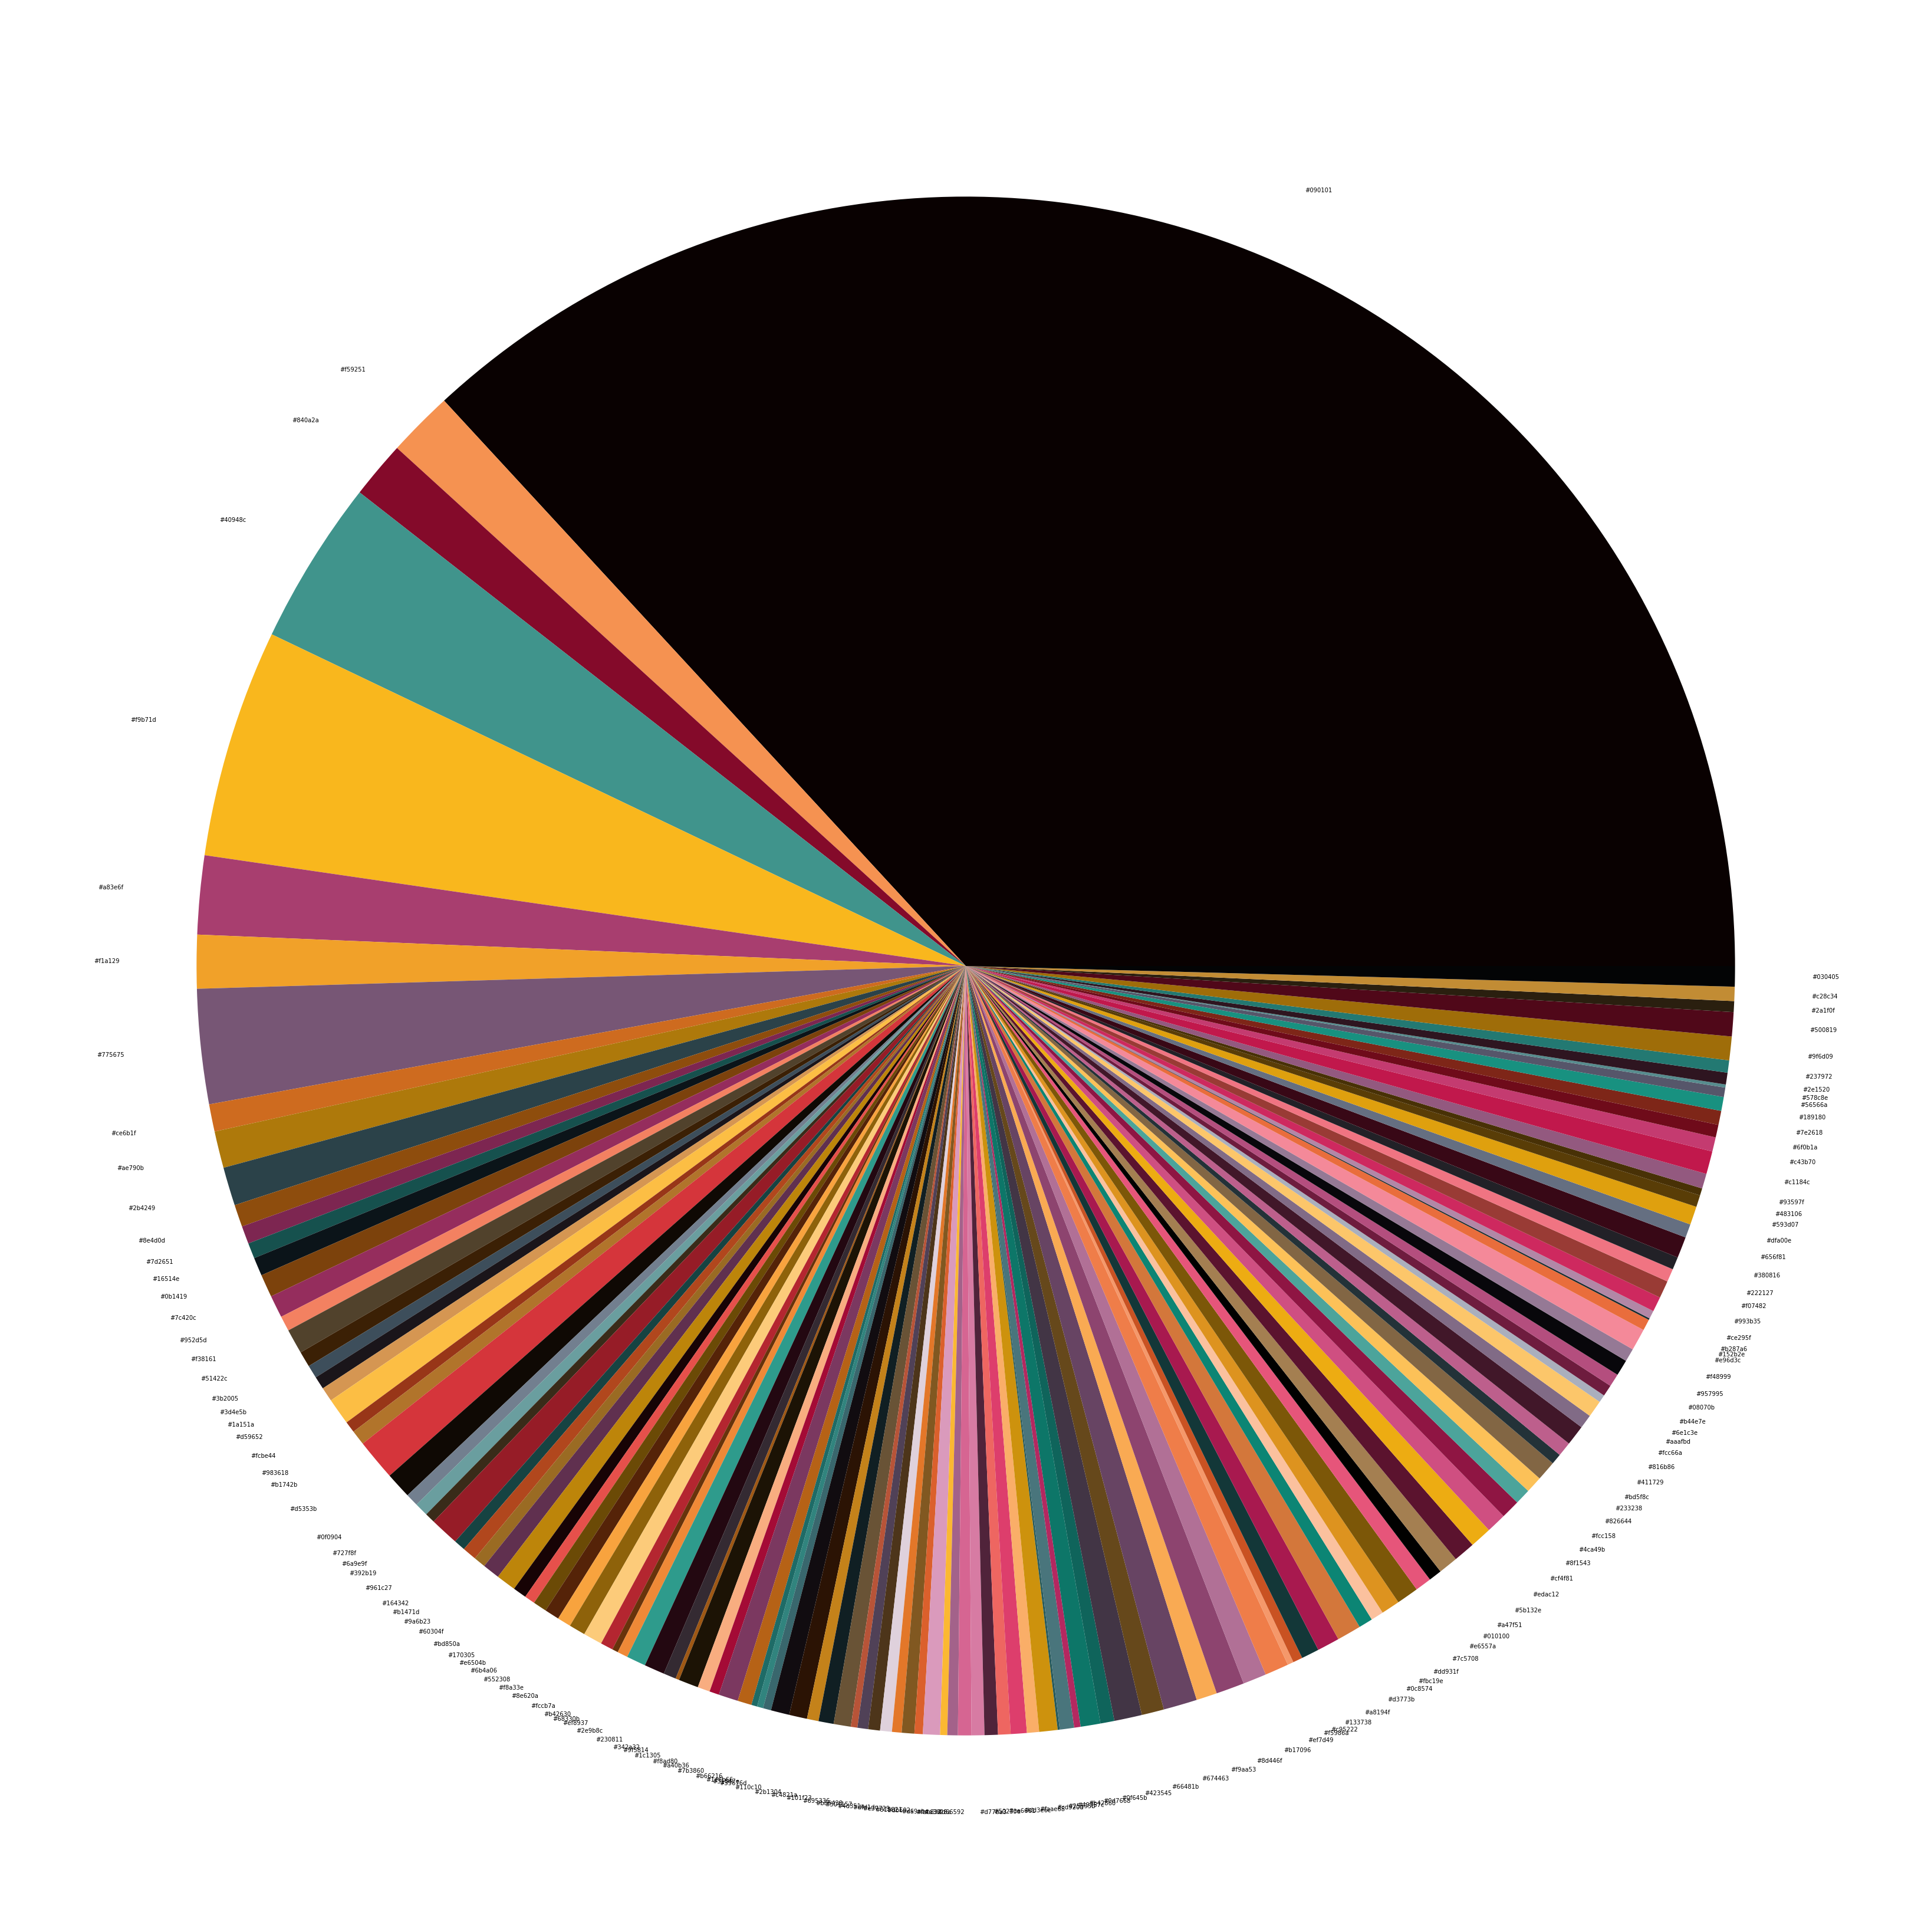

In [158]:
color_chart('color2.jpg')

In [162]:
requested_colour = (dominant_color('color2.jpg'))
actual_name, closest_name = get_colour_name(requested_colour)
print ("Actual colour name:", actual_name, ", closest colour name:", closest_name)

Actual colour name: None , closest colour name: black
